                                                                     Data Science
                                                                      Final Exam 

We start by importing the basic libraries.

In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve, mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn.tree import plot_tree
from sklearn import datasets, linear_model, metrics
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

We then import the dataset either from the local system or Github.

In [50]:
df = pd.read_csv('/Users/pratiksha/Downloads/conversion_data.csv')

For having a rough idea of the dataset we will look at some basic functions for a fair view.

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2000 non-null   int64  
 1   visitor_id         2000 non-null   int64  
 2   visitor_location   2000 non-null   object 
 3   marketing_channel  2000 non-null   object 
 4   gender             2000 non-null   object 
 5   product_views_Mon  2000 non-null   int64  
 6   product_views_Tue  2000 non-null   int64  
 7   product_views_Wed  2000 non-null   int64  
 8   product_views_Thu  2000 non-null   int64  
 9   product_views_Fri  2000 non-null   int64  
 10  avg_rating_Mon     2000 non-null   float64
 11  avg_rating_Tue     2000 non-null   float64
 12  avg_rating_Wed     2000 non-null   float64
 13  avg_rating_Thu     2000 non-null   float64
 14  avg_rating_Fri     2000 non-null   float64
 15  avg_price_Mon      2000 non-null   float64
 16  avg_price_Tue      2000 

In [52]:
df.head()

,Unnamed: 0,visitor_id,visitor_location,marketing_channel,gender,product_views_Mon,product_views_Tue,product_views_Wed,product_views_Thu,product_views_Fri,...,time_on_site_Tue,time_on_site_Wed,time_on_site_Thu,time_on_site_Fri,pages_visited_Mon,pages_visited_Tue,pages_visited_Wed,pages_visited_Thu,pages_visited_Fri,converted_Fri
0,0,1,North America,youtube,M,4,5,2,1,2,...,33,23,46,57,4,5,5,4,6,1
1,1,2,South America,organic,F,2,5,0,1,5,...,28,39,24,51,5,6,7,6,2,0
2,2,3,Australia,instagram,M,3,4,0,-3,5,...,34,22,34,31,1,3,3,2,3,1
3,3,4,North America,facebook,M,1,0,0,5,0,...,26,43,22,39,3,4,7,7,1,0
4,4,5,Asia,instagram,F,1,5,2,2,3,...,54,30,47,57,6,6,5,2,4,1


In [53]:
df.describe(include = 'all')

,Unnamed: 0,visitor_id,visitor_location,marketing_channel,gender,product_views_Mon,product_views_Tue,product_views_Wed,product_views_Thu,product_views_Fri,...,time_on_site_Tue,time_on_site_Wed,time_on_site_Thu,time_on_site_Fri,pages_visited_Mon,pages_visited_Tue,pages_visited_Wed,pages_visited_Thu,pages_visited_Fri,converted_Fri
count,2000.000000,2000.000000,2000,2000,2000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
unique,NaN,NaN,5,5,2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,South America,instagram,F,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,433,431,1093,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,999.500000,1000.500000,NaN,NaN,NaN,2.541500,2.440500,2.441000,2.256500,2.354000,...,39.776500,40.155500,40.417000,40.028500,3.946000,4.071000,4.092500,3.921000,4.089500,0.372000
std,577.494589,577.494589,NaN,NaN,NaN,1.704914,1.715206,2.343345,2.370974,2.335682,...,11.855624,11.757399,11.892638,11.664207,2.010001,2.012209,2.002985,2.023316,2.026954,0.483459
min,0.000000,1.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,-4.000000,-3.000000,...,20.000000,20.000000,20.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,499.750000,500.750000,NaN,NaN,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,...,29.000000,30.000000,30.000000,30.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000
50%,999.500000,1000.500000,NaN,NaN,NaN,3.000000,2.000000,2.000000,2.000000,2.000000,...,40.000000,40.000000,40.500000,40.000000,4.000000,4.000000,4.000000,4.000000,4.000000,0.000000
75%,1499.250000,1500.250000,NaN,NaN,NaN,4.000000,4.000000,4.000000,5.000000,5.000000,...,50.000000,50.000000,51.000000,50.000000,6.000000,6.000000,6.000000,6.000000,6.000000,1.000000


We can see that the dataset contains 2000 records and there are no null values in the dataset so cleaning of the dataset is not required. However, we just need to remove the first column since it is 'unnamed' and is of no relevance to us so we will use the drop() function to remove that column.

In [54]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   visitor_id         2000 non-null   int64  
 1   visitor_location   2000 non-null   object 
 2   marketing_channel  2000 non-null   object 
 3   gender             2000 non-null   object 
 4   product_views_Mon  2000 non-null   int64  
 5   product_views_Tue  2000 non-null   int64  
 6   product_views_Wed  2000 non-null   int64  
 7   product_views_Thu  2000 non-null   int64  
 8   product_views_Fri  2000 non-null   int64  
 9   avg_rating_Mon     2000 non-null   float64
 10  avg_rating_Tue     2000 non-null   float64
 11  avg_rating_Wed     2000 non-null   float64
 12  avg_rating_Thu     2000 non-null   float64
 13  avg_rating_Fri     2000 non-null   float64
 14  avg_price_Mon      2000 non-null   float64
 15  avg_price_Tue      2000 non-null   float64
 16  avg_price_Wed      2000 

Now we have the filtered dataset and we can now look into some EDA for gathering visual insights of our dataset. We will start with univariate analyis of the numerical columns in our dataset.

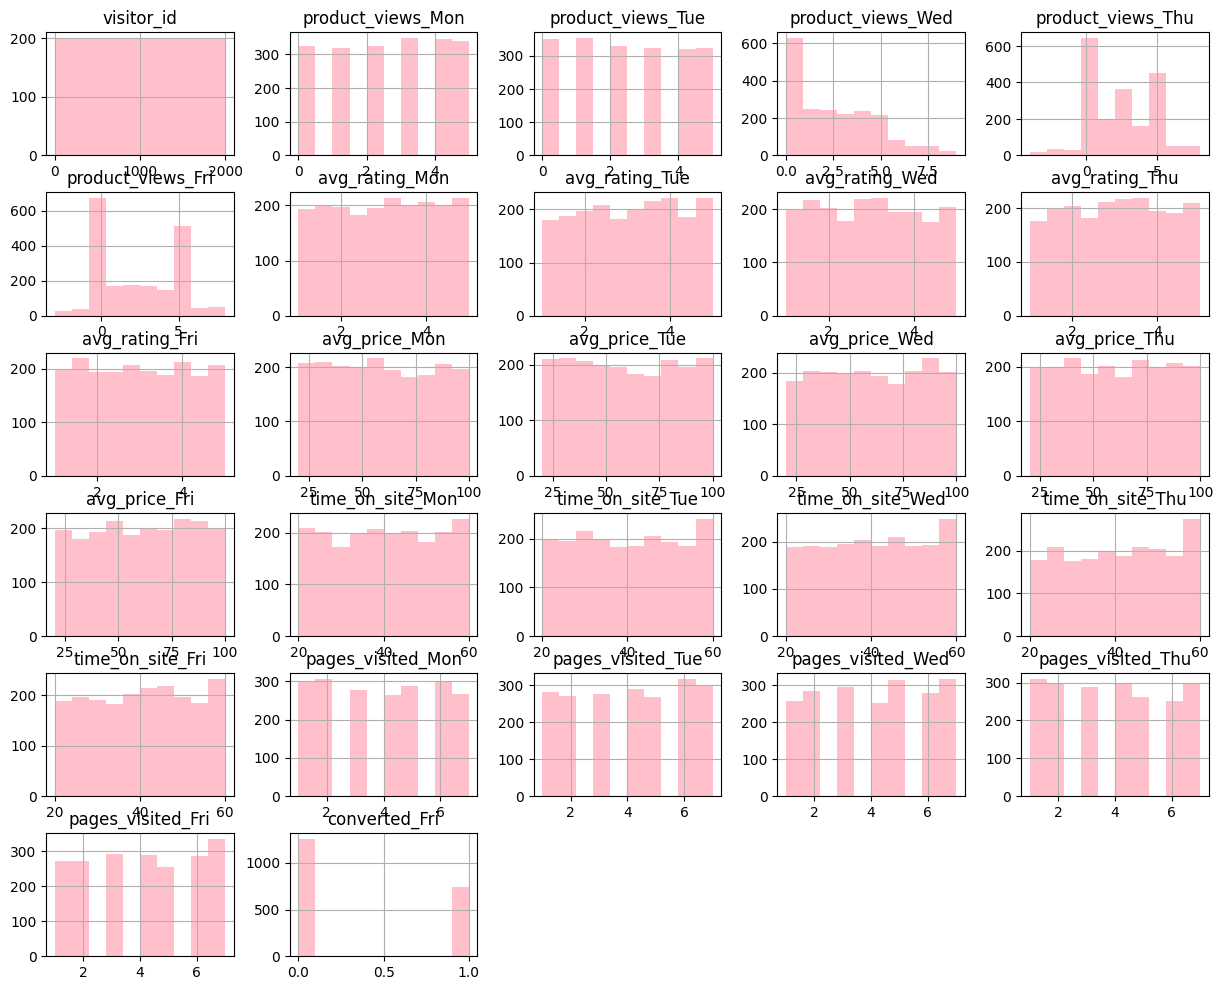

In [56]:
df.hist(figsize=(15, 12), color='pink')
plt.show()

We will then look into bivariate analysis of the categorical columns and compare them with our target variable.

<Axes: xlabel='converted_Fri', ylabel='gender'>

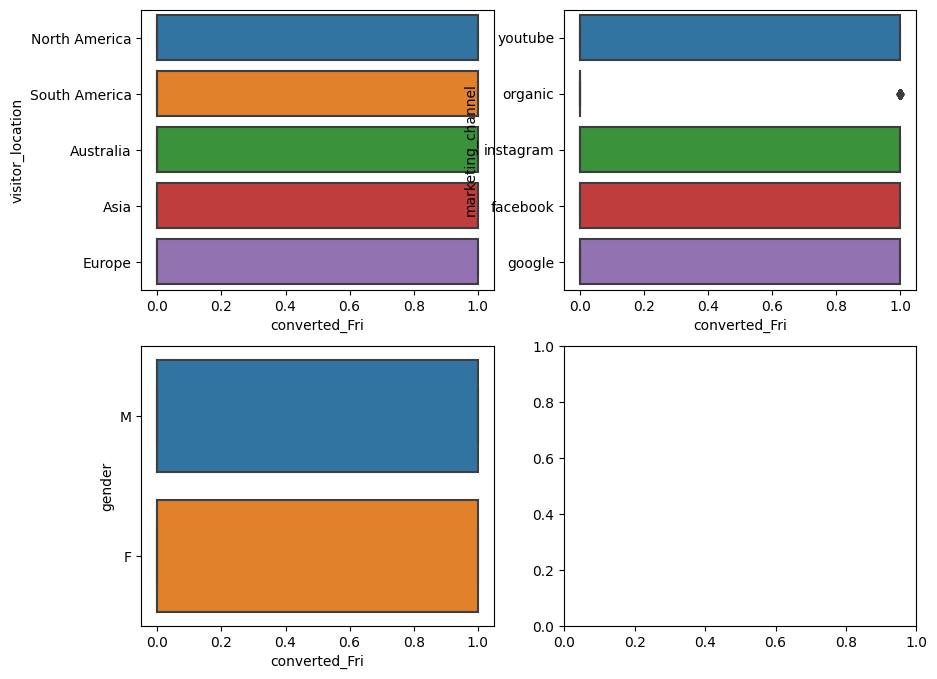

In [57]:
fig, ((ax1, ax2), (ax3, __)) = plt.subplots(2,2, figsize=(10,8))

sns.boxplot(x='converted_Fri',y='visitor_location', data=df, ax=ax1)
sns.boxplot(x='converted_Fri',y='marketing_channel', data=df, ax=ax2)
sns.boxplot(x='converted_Fri',y='gender', data=df, ax=ax3)

This is a binary classification problem as we have to see if the customer is converted or not on Friday so we will test different models to check that. We will start checking now what model works best for our analysis. Starting with KNN Model. We will fit our categorical and numerical columns into the pipeline to get results.

In [58]:
cat_columns = ['visitor_location','marketing_channel','gender']
num_columns = ['product_views_Mon','product_views_Tue','product_views_Wed','product_views_Thu','product_views_Fri','avg_rating_Mon','avg_rating_Tue',
               'avg_rating_Wed','avg_rating_Thu','avg_rating_Fri','avg_price_Mon','avg_price_Tue','avg_price_Wed','avg_price_Thu','avg_price_Fri',
               'time_on_site_Mon','time_on_site_Tue','time_on_site_Wed','time_on_site_Thu','time_on_site_Fri','pages_visited_Mon','pages_visited_Tue',
               'pages_visited_Wed','pages_visited_Thu','pages_visited_Fri']
target = 'converted_Fri'

In [59]:
# build pipeline
cat_transformer = OneHotEncoder(handle_unknown='ignore')
num_transformer = StandardScaler()
preprocessor = ColumnTransformer(transformers = [('cat',cat_transformer, cat_columns),
                                                 ('num', num_transformer, num_columns)])

In [60]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(df[cat_columns + num_columns], df[target], test_size=0.2, random_state=42)

In [61]:
x_train_transformed = preprocessor.fit_transform(X_train)
x_test_transformed = preprocessor.fit_transform(X_test)

In [62]:
x_train_transformed.shape

(1600, 37)

In [63]:
x_test_transformed.shape

(400, 37)

In [64]:
encoded_columns = list(preprocessor.named_transformers_['cat'].get_feature_names_out(cat_columns))
all_feat = num_columns + encoded_columns

X_train_transformed = pd.DataFrame(x_train_transformed, columns=all_feat)
X_test_transformed = pd.DataFrame(x_test_transformed, columns=all_feat)

In [65]:
knn = KNeighborsClassifier(n_neighbors = 40)
knn.fit(X_train_transformed, y_train)
y_pred = knn.predict(X_test_transformed)
print(f1_score(y_pred, y_test))
print(accuracy_score(y_pred, y_test))

0.5555555555555556
0.72


In [66]:
recall = []

for a in range(1,100):
    knn = KNeighborsClassifier(n_neighbors = a)
    knn.fit(X_train_transformed, y_train)
    y_pred = knn.predict(X_test_transformed)
    # print(f1_score(y_pred, y_test))
    recall.append(recall_score(y_pred, y_test))

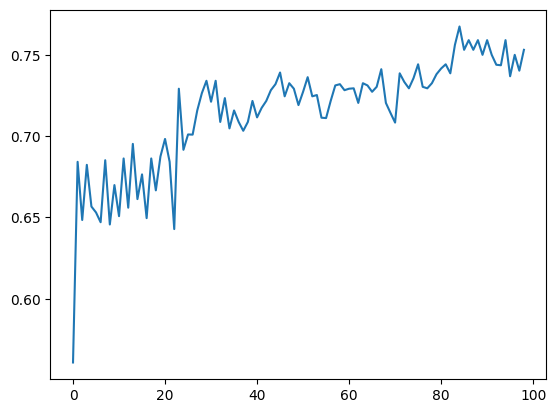

In [67]:
plt.plot(recall)

In [68]:
# Hyperparameter tuning
# select parameters
params_nb = {'var_smoothing': np.logspace(0,-9, num=100)}
params_knn = {'n_neighbors': list(range(1,200)), 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']}

# Define the models
nb = GaussianNB()
knn = KNeighborsClassifier()

# Define GridSearchCV
gridsearch_knn = GridSearchCV(knn, params_knn, cv=10, scoring='recall')
    #nb, params_nb, cv=5)
randomsearch_knn = RandomizedSearchCV(knn, params_knn, cv=10, n_iter = 50, scoring='recall')

# Fit models
gridsearch_knn.fit(X_train_transformed, y_train)
randomsearch_knn.fit(X_train_transformed, y_train)

# Get the best parameters
print("Best parameters for KNN - gridsearch: ", gridsearch_knn.best_params_)
print("Best parameters for KNN - randomsearch: ", randomsearch_knn.best_params_)

Best parameters for KNN - gridsearch:  {'metric': 'manhattan', 'n_neighbors': 6, 'weights': 'distance'}
Best parameters for KNN - randomsearch:  {'weights': 'distance', 'n_neighbors': 12, 'metric': 'manhattan'}


In [69]:
# Apply the best parameters
#nb_best = GaussianNB(**gridsearch_nb.best_params_)
knn_best = KNeighborsClassifier(**gridsearch_knn.best_params_)

# Perform cross-validation
#cv_scores_nb = cross_val_score(nb_best, X_train_transformed, y_train, cv=5, scoring='roc_auc')
cv_scores_knn = cross_val_score(knn_best, X_train_transformed, y_train, cv=10, scoring='precision')

#print("Cross-validation scores for Naive Bayes: ", cv_scores_nb)
print("Cross-validation scores for KNN: ", cv_scores_knn)

# Fit the models with the best parameters
#nb_best.fit(X_train_transformed, y_train)
knn_best.fit(X_train_transformed, y_train)

# Evaluate on the test set
#y_pred_nb = nb_best.predict(X_test_transformed)
y_pred_knn = knn_best.predict(X_test_transformed)

#print("Test accuracy for Naive Bayes: ", accuracy_score(y_test, y_pred_nb))
print("Test accuracy for KNN: ", accuracy_score(y_test, y_pred_knn))

Cross-validation scores for KNN:  [0.66037736 0.6440678  0.67307692 0.69642857 0.61702128 0.75555556
 0.62711864 0.63492063 0.7        0.67307692]
Test accuracy for KNN:  0.7375


In [70]:
# Compute metrics
# print("Naive Bayes Metrics: ")
# print("Confusion Matrix: ", confusion_matrix(y_test, y_pred_nb))
# print("Accuracy: ", accuracy_score(y_test, y_pred_nb))
# print("Precision: ", precision_score(y_test, y_pred_nb))
# print("Recall: ", recall_score(y_test, y_pred_nb))
# print("F1 Score: ", f1_score(y_test, y_pred_nb))

print("\nK-Nearest Neighbors Metrics: ")
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred_knn))
print("Accuracy: ", accuracy_score(y_test, y_pred_knn))
print("Precision: ", precision_score(y_test, y_pred_knn))
print("Recall: ", recall_score(y_test, y_pred_knn))
print("F1 Score: ", f1_score(y_test, y_pred_knn))


K-Nearest Neighbors Metrics: 
Confusion Matrix:  [[199  46]
 [ 59  96]]
Accuracy:  0.7375
Precision:  0.676056338028169
Recall:  0.6193548387096774
F1 Score:  0.6464646464646465


We can see that the KNN model is 73% accurate and 67% precise having a F1 score of 64%. This doesn't look like a bad model for our analysis. However, we will look out for other models to get better results, if applicable. We will then move towards the Decision Tree.

In [71]:
cat_columns = ['visitor_location','marketing_channel','gender']

In [72]:
X = df.iloc[:,:29]
Y = df.iloc[:, 29]

In [73]:
Y_v2 = df.iloc[:,29]

In [74]:
Y_v2

0       1
1       0
2       1
3       0
4       1
       ..
1995    0
1996    0
1997    0
1998    1
1999    1
Name: converted_Fri, Length: 2000, dtype: int64

In [75]:
Y

0       1
1       0
2       1
3       0
4       1
       ..
1995    0
1996    0
1997    0
1998    1
1999    1
Name: converted_Fri, Length: 2000, dtype: int64

In [76]:
X_encoded = pd.get_dummies(X, columns=cat_columns, dtype=int)

In [77]:
X_encoded

,visitor_id,product_views_Mon,product_views_Tue,product_views_Wed,product_views_Thu,product_views_Fri,avg_rating_Mon,avg_rating_Tue,avg_rating_Wed,avg_rating_Thu,...,visitor_location_Europe,visitor_location_North America,visitor_location_South America,marketing_channel_facebook,marketing_channel_google,marketing_channel_instagram,marketing_channel_organic,marketing_channel_youtube,gender_F,gender_M
0,1,4,5,2,1,2,3.90,2.19,4.87,3.47,...,0,1,0,0,0,0,0,1,0,1
1,2,2,5,0,1,5,1.31,2.16,1.98,3.09,...,0,0,1,0,0,0,1,0,1,0
2,3,3,4,0,-3,5,3.26,4.79,3.12,2.58,...,0,0,0,0,0,1,0,0,0,1
3,4,1,0,0,5,0,2.66,4.79,3.41,2.28,...,0,1,0,1,0,0,0,0,0,1
4,5,1,5,2,2,3,2.76,2.38,3.32,1.62,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,3,0,0,4,2,4.80,3.98,2.73,2.19,...,1,0,0,0,0,0,1,0,1,0
1996,1997,1,2,0,4,1,1.34,1.26,1.53,2.61,...,0,0,1,0,1,0,0,0,0,1
1997,1998,2,3,0,0,8,2.56,4.18,2.17,2.90,...,0,0,0,1,0,0,0,0,0,1
1998,1999,2,2,2,5,5,4.49,3.00,2.83,4.74,...,0,0,1,0,0,0,0,1,1,0


In [78]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, Y, random_state=123)

In [79]:
dt = DecisionTreeClassifier(random_state=123)
dt = dt.fit(X_train, y_train)

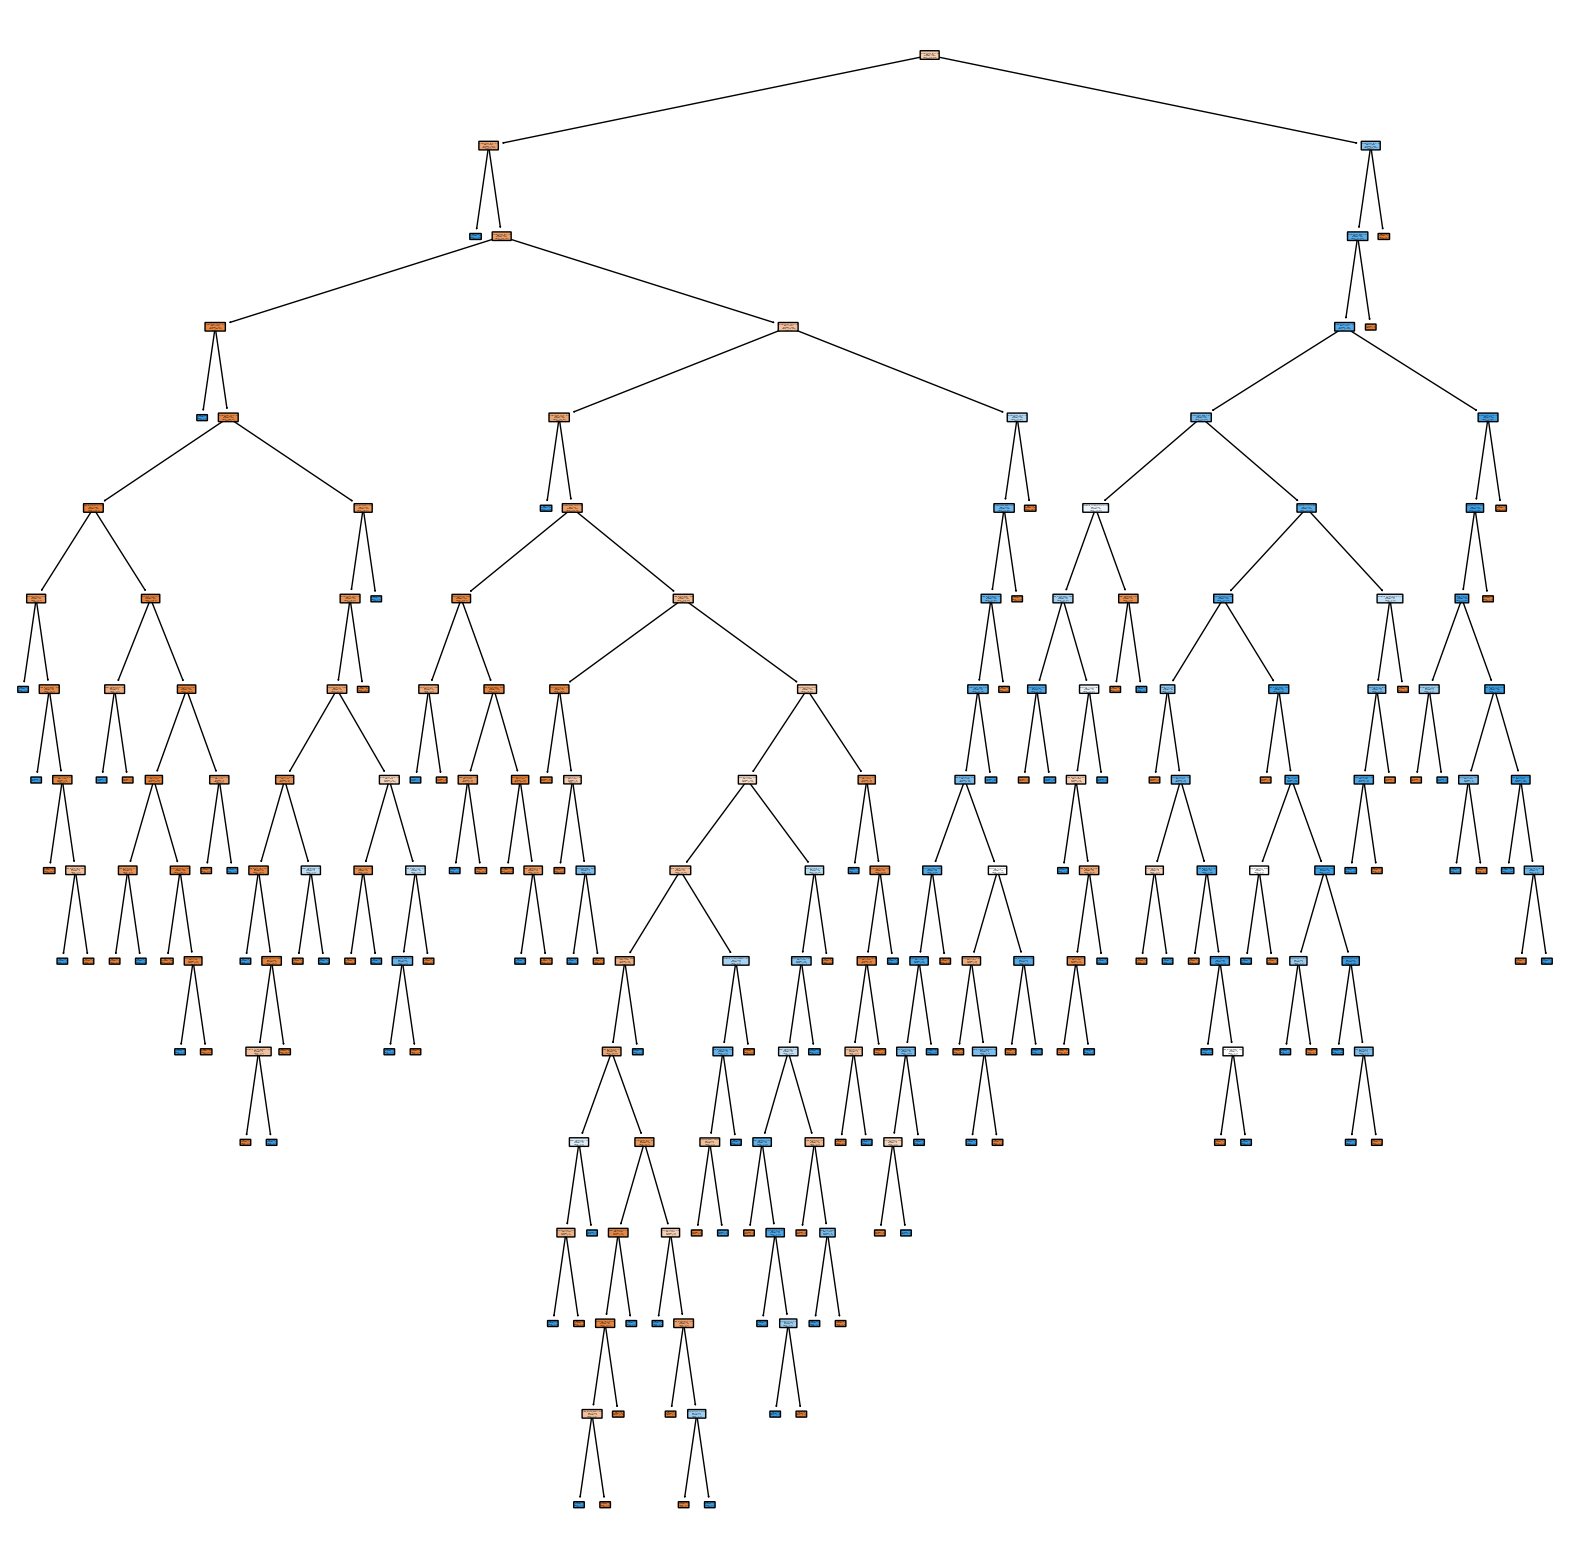

In [80]:
plt.figure(figsize=(20,20))
plot_tree(dt, filled=True, rounded=True, class_names=['0','1','2','3','4'], feature_names=X_encoded.columns);

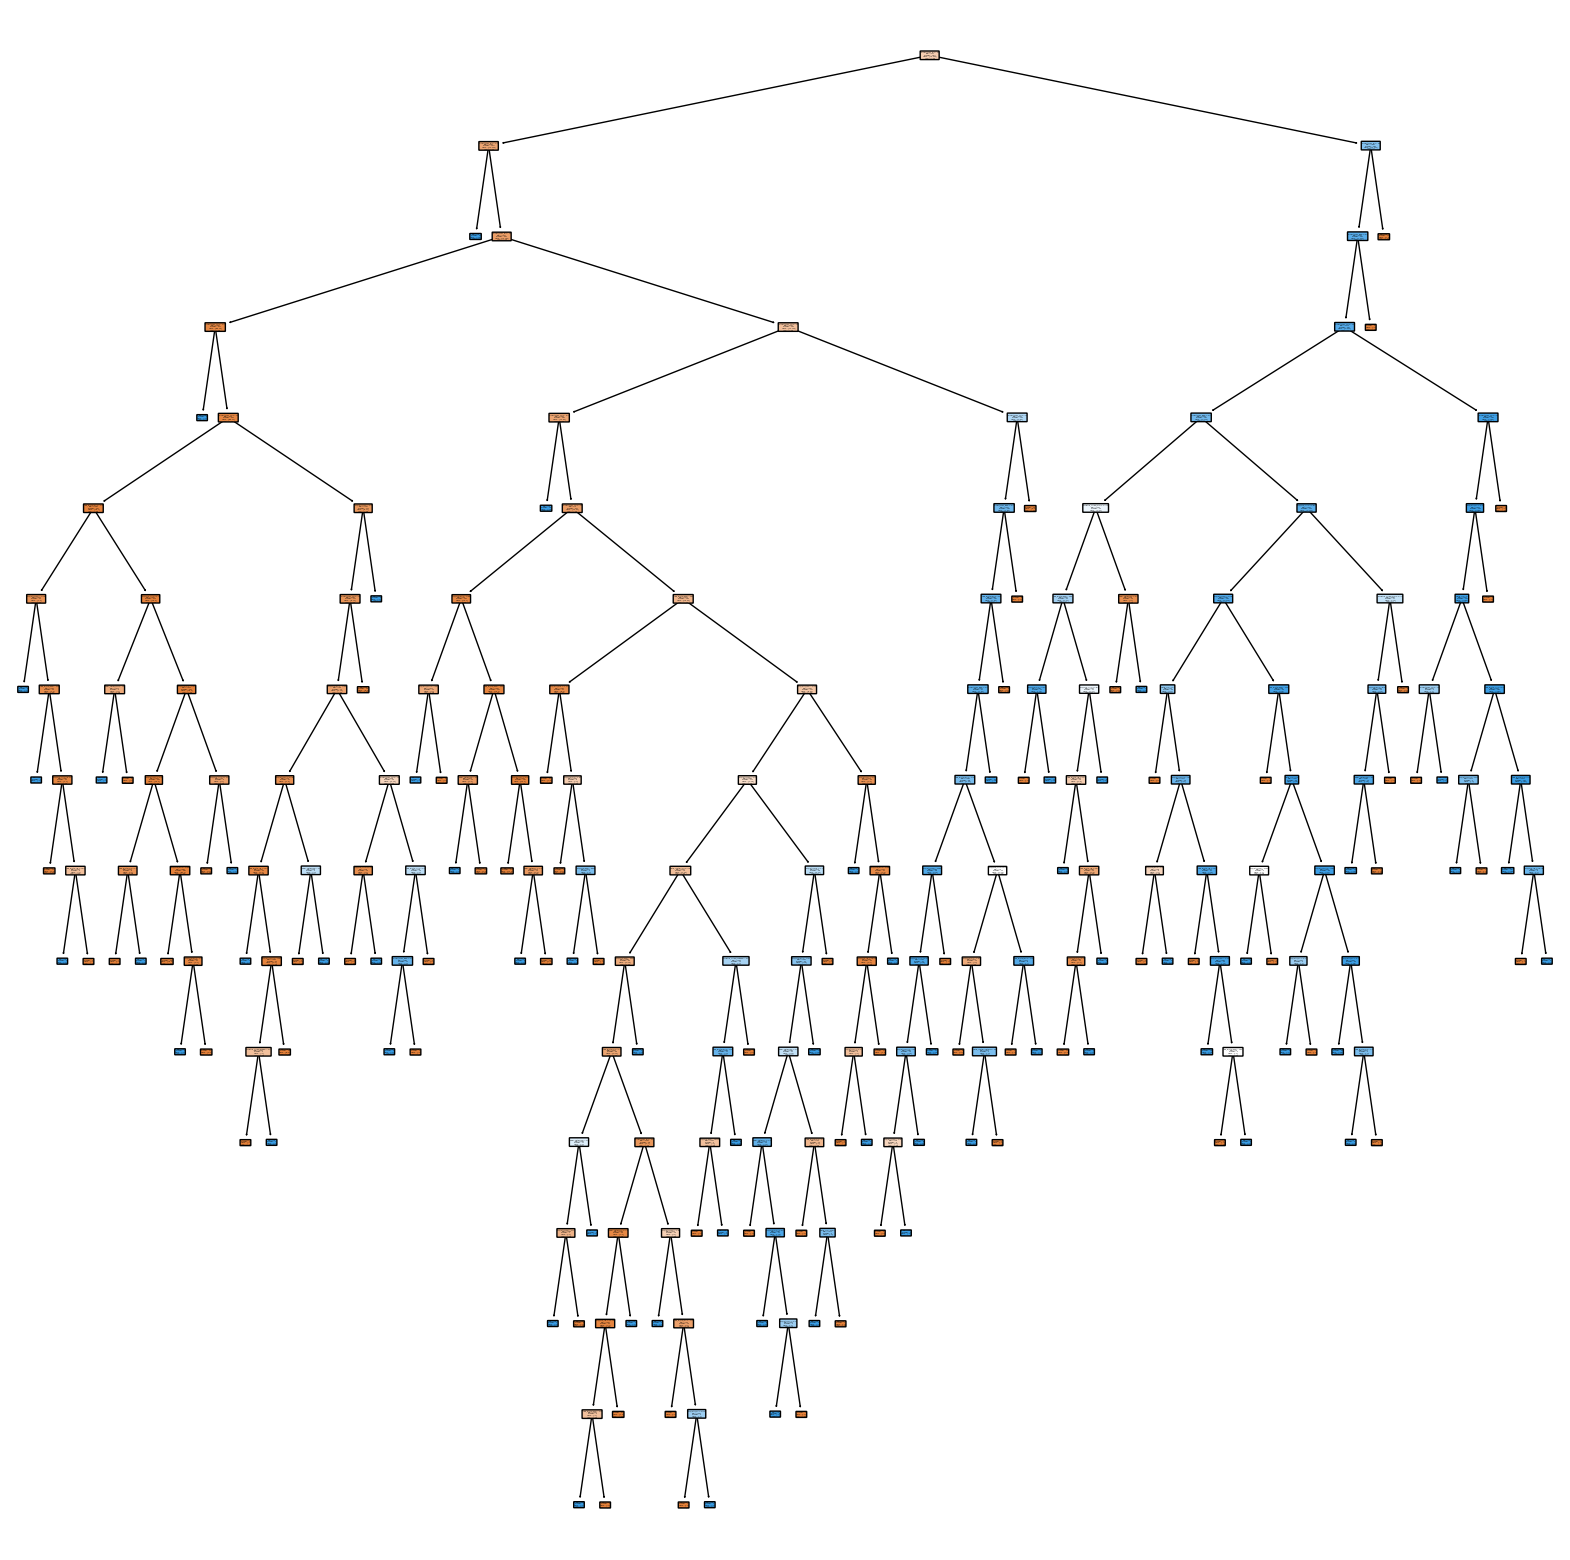

In [81]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_encoded, Y_v2, random_state=123)
dt_v2 = DecisionTreeClassifier(random_state=123)
dt_v2 = dt_v2.fit(X_train2, y_train2)
plt.figure(figsize=(20,20))
plot_tree(dt_v2, filled=True, rounded=True, class_names=['no_hd','hd'], feature_names=X_encoded.columns);

In [82]:
predicted = dt.predict(X_test)

In [83]:
predicted

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,

In [84]:
predicted_v2 = dt_v2.predict(X_test2)

In [85]:
print('v1_model: ', accuracy_score(predicted, y_test))
print('v2_model: ', accuracy_score(predicted_v2, y_test2))


v1_model:  0.866
v2_model:  0.866


In [86]:
predicted_train = dt.predict(X_train)
print(accuracy_score(predicted_train, y_train))

1.0


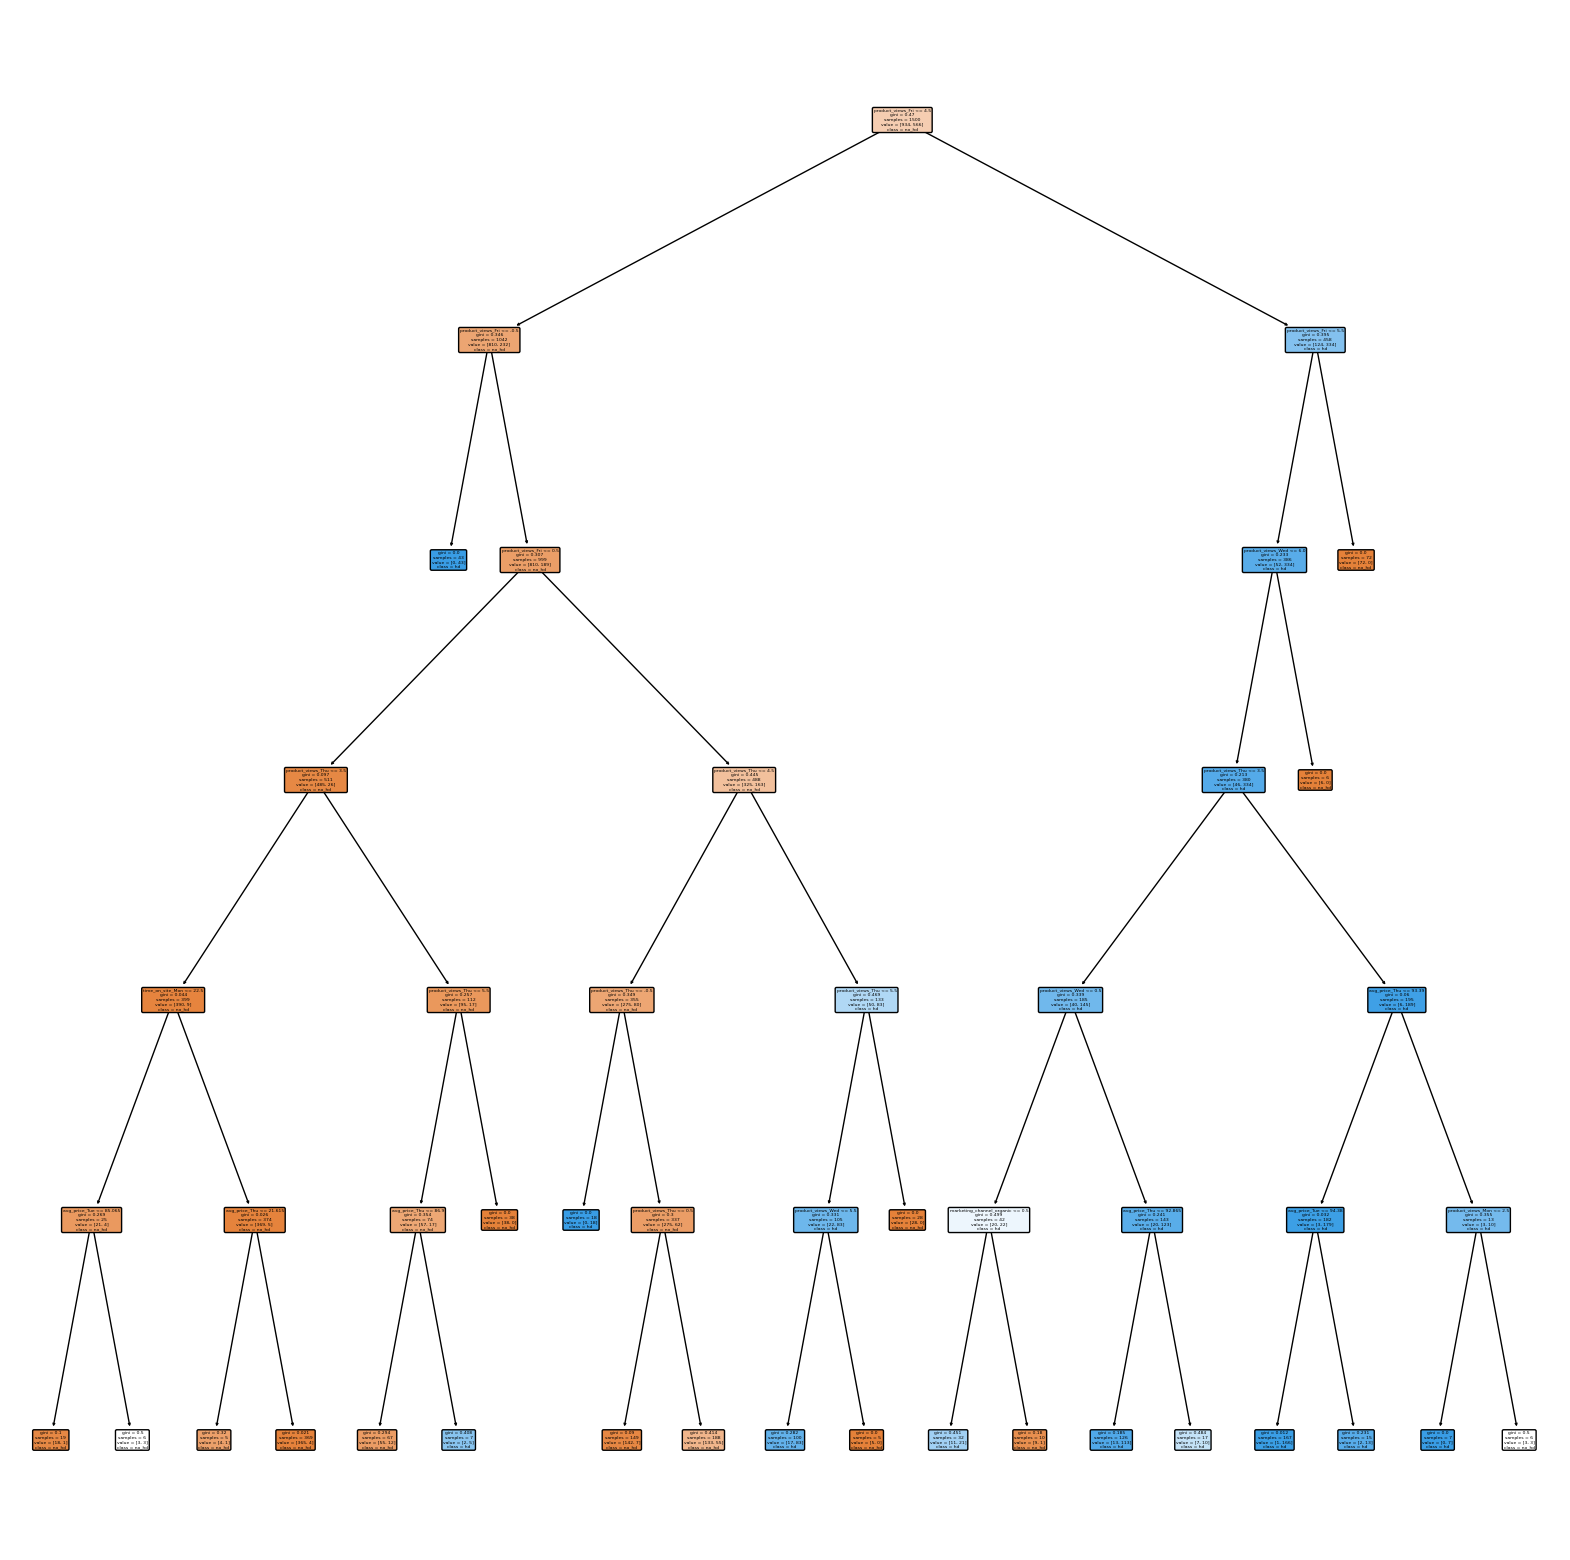

In [87]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_encoded, Y_v2, random_state=123)
dt_v3 = DecisionTreeClassifier(random_state=123, max_depth = 6, min_samples_leaf = 5)
dt_v3 = dt_v3.fit(X_train3, y_train3)
plt.figure(figsize=(20,20))
plot_tree(dt_v3, filled=True, rounded=True, class_names=['no_hd','hd'], feature_names=X_encoded.columns);

In [88]:
pred3 = dt_v3.predict(X_test3)

In [89]:
print(accuracy_score(pred3, y_test3))

0.89


In [90]:
pred3_train = dt_v3.predict(X_train3)
print(accuracy_score(pred3_train, y_train3))

0.9066666666666666


The results tell us that the accuracy score is 90% which seems pretty decent to be accepted. We will still check for other models to decipher more results.

We will create dummies for the categorical variables such as gender, marketing_channel and visitor_location to further perform logistic regression on our dataset.

In [91]:
visitor_location_dummies = pd.get_dummies(df['visitor_location'])
marketing_channel_dummies = pd.get_dummies(df['marketing_channel'])
gender_dummies = pd.get_dummies(df['gender'])

In [92]:
df = pd.concat([df,visitor_location_dummies,marketing_channel_dummies,gender_dummies],axis=1)

In [93]:
df.drop(['visitor_location','marketing_channel','gender'],axis=1, inplace=True)

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   visitor_id         2000 non-null   int64  
 1   product_views_Mon  2000 non-null   int64  
 2   product_views_Tue  2000 non-null   int64  
 3   product_views_Wed  2000 non-null   int64  
 4   product_views_Thu  2000 non-null   int64  
 5   product_views_Fri  2000 non-null   int64  
 6   avg_rating_Mon     2000 non-null   float64
 7   avg_rating_Tue     2000 non-null   float64
 8   avg_rating_Wed     2000 non-null   float64
 9   avg_rating_Thu     2000 non-null   float64
 10  avg_rating_Fri     2000 non-null   float64
 11  avg_price_Mon      2000 non-null   float64
 12  avg_price_Tue      2000 non-null   float64
 13  avg_price_Wed      2000 non-null   float64
 14  avg_price_Thu      2000 non-null   float64
 15  avg_price_Fri      2000 non-null   float64
 16  time_on_site_Mon   2000 

As we can see now the dummies are created and there are no objects in our dataframe. We will now perform Logistic Regression, Gaussian NB which is a part of Naive Bayes test and KNN.

In [101]:
log = LogisticRegression()
nb = GaussianNB()
knn = KNeighborsClassifier()

In [102]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [103]:
log.fit(x_train,y_train)
nb.fit(x_train,y_train)
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [104]:
yhat_log = log.predict_proba(x_test)
yhat_nb = nb.predict_proba(x_test)
yhat_knn = knn.predict(x_test)

In [105]:
yhat_log

array([[0.48976911, 0.51023089],
       [0.825584  , 0.174416  ],
       [0.8709011 , 0.1290989 ],
       [0.29181573, 0.70818427],
       [0.76811511, 0.23188489],
       [0.82376072, 0.17623928],
       [0.37590283, 0.62409717],
       [0.47562697, 0.52437303],
       [0.36143897, 0.63856103],
       [0.65224215, 0.34775785],
       [0.81769019, 0.18230981],
       [0.6523826 , 0.3476174 ],
       [0.82492085, 0.17507915],
       [0.33346385, 0.66653615],
       [0.79758131, 0.20241869],
       [0.76202418, 0.23797582],
       [0.39296681, 0.60703319],
       [0.74107786, 0.25892214],
       [0.83596122, 0.16403878],
       [0.236863  , 0.763137  ],
       [0.48173002, 0.51826998],
       [0.24508846, 0.75491154],
       [0.6966189 , 0.3033811 ],
       [0.50408442, 0.49591558],
       [0.79620242, 0.20379758],
       [0.90456878, 0.09543122],
       [0.79646283, 0.20353717],
       [0.50801198, 0.49198802],
       [0.2387142 , 0.7612858 ],
       [0.75491311, 0.24508689],
       [0.

In [106]:
log.predict(x_test)

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,

In [107]:
yhat_log[:,1]

array([0.51023089, 0.174416  , 0.1290989 , 0.70818427, 0.23188489,
       0.17623928, 0.62409717, 0.52437303, 0.63856103, 0.34775785,
       0.18230981, 0.3476174 , 0.17507915, 0.66653615, 0.20241869,
       0.23797582, 0.60703319, 0.25892214, 0.16403878, 0.763137  ,
       0.51826998, 0.75491154, 0.3033811 , 0.49591558, 0.20379758,
       0.09543122, 0.20353717, 0.49198802, 0.7612858 , 0.24508689,
       0.17337628, 0.49092705, 0.67258542, 0.48887843, 0.13209603,
       0.20165394, 0.85236771, 0.27839669, 0.53235083, 0.1206989 ,
       0.16829134, 0.55264504, 0.12115815, 0.43979893, 0.7252568 ,
       0.3349093 , 0.38712329, 0.63048535, 0.21683184, 0.70639581,
       0.32213471, 0.28761923, 0.7210992 , 0.66524472, 0.13181316,
       0.82470202, 0.20712576, 0.59978845, 0.85354192, 0.29056895,
       0.24983376, 0.14218892, 0.61414284, 0.17035596, 0.17994997,
       0.59153779, 0.13064129, 0.65432666, 0.41921192, 0.68313074,
       0.61605958, 0.39133586, 0.62628408, 0.36242412, 0.23562

In [108]:
fpr, tpr, thresholds = roc_curve(y_test, yhat_log[:,1])

In [109]:
fpr

array([0.        , 0.        , 0.00416667, 0.00416667, 0.00833333,
       0.00833333, 0.0125    , 0.0125    , 0.01666667, 0.01666667,
       0.02083333, 0.02083333, 0.025     , 0.025     , 0.03333333,
       0.03333333, 0.0375    , 0.0375    , 0.04166667, 0.04166667,
       0.04583333, 0.04583333, 0.05416667, 0.05416667, 0.05833333,
       0.05833333, 0.0625    , 0.0625    , 0.07083333, 0.07083333,
       0.075     , 0.075     , 0.07916667, 0.07916667, 0.08333333,
       0.08333333, 0.0875    , 0.0875    , 0.09166667, 0.09166667,
       0.09583333, 0.09583333, 0.1       , 0.1       , 0.10416667,
       0.10416667, 0.11666667, 0.11666667, 0.125     , 0.125     ,
       0.13333333, 0.13333333, 0.1375    , 0.1375    , 0.14583333,
       0.14583333, 0.15      , 0.15      , 0.15416667, 0.15416667,
       0.1625    , 0.1625    , 0.16666667, 0.16666667, 0.17916667,
       0.17916667, 0.18333333, 0.18333333, 0.1875    , 0.1875    ,
       0.19166667, 0.19166667, 0.19583333, 0.19583333, 0.2    

In [110]:
tpr

array([0.     , 0.00625, 0.00625, 0.0125 , 0.0125 , 0.025  , 0.025  ,
       0.04375, 0.04375, 0.05   , 0.05   , 0.0625 , 0.0625 , 0.08125,
       0.08125, 0.175  , 0.175  , 0.2    , 0.2    , 0.24375, 0.24375,
       0.26875, 0.26875, 0.275  , 0.275  , 0.2875 , 0.2875 , 0.29375,
       0.29375, 0.3    , 0.3    , 0.30625, 0.30625, 0.3125 , 0.3125 ,
       0.3875 , 0.3875 , 0.4    , 0.4    , 0.4125 , 0.4125 , 0.44375,
       0.44375, 0.5    , 0.5    , 0.5125 , 0.5125 , 0.51875, 0.51875,
       0.525  , 0.525  , 0.56875, 0.56875, 0.575  , 0.575  , 0.58125,
       0.58125, 0.59375, 0.59375, 0.6    , 0.6    , 0.60625, 0.60625,
       0.6125 , 0.6125 , 0.61875, 0.61875, 0.625  , 0.625  , 0.63125,
       0.63125, 0.6375 , 0.6375 , 0.65   , 0.65   , 0.6625 , 0.6625 ,
       0.69375, 0.69375, 0.7    , 0.7    , 0.70625, 0.70625, 0.7125 ,
       0.7125 , 0.71875, 0.71875, 0.725  , 0.725  , 0.73125, 0.73125,
       0.74375, 0.74375, 0.75   , 0.75   , 0.75625, 0.75625, 0.76875,
       0.76875, 0.78

In [111]:
thresholds

array([1.85354192, 0.85354192, 0.85236771, 0.83912004, 0.82470202,
       0.79082478, 0.77527298, 0.76722641, 0.76500155, 0.763137  ,
       0.7612858 , 0.75491154, 0.74626952, 0.73637867, 0.73463348,
       0.70267711, 0.70218471, 0.69721246, 0.69584198, 0.67087709,
       0.66664622, 0.66457126, 0.66040479, 0.66026754, 0.65969128,
       0.65923975, 0.65630678, 0.65513522, 0.65268655, 0.64858616,
       0.64694566, 0.64570124, 0.64372861, 0.64246347, 0.64112772,
       0.62628408, 0.62432548, 0.62318455, 0.622831  , 0.61605958,
       0.61503702, 0.60598114, 0.60490163, 0.58587534, 0.58463309,
       0.57783247, 0.56948249, 0.56794424, 0.56544514, 0.56456709,
       0.55866204, 0.53235083, 0.52597977, 0.52585797, 0.52405788,
       0.51826998, 0.51122129, 0.50776197, 0.50138046, 0.49591558,
       0.49112193, 0.49092705, 0.49031936, 0.48887843, 0.48466004,
       0.47928837, 0.47343753, 0.47206772, 0.46948818, 0.46793409,
       0.4676479 , 0.46726699, 0.466608  , 0.46393715, 0.45766

Text(0, 0.5, 'True Positive Rate')

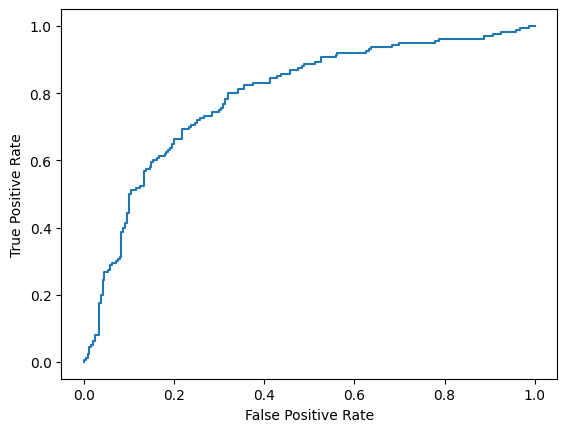

In [112]:
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [113]:
gmeans = np.sqrt(tpr*(1-fpr))
gmeans

array([0.        , 0.07905694, 0.07889207, 0.11157023, 0.11133658,
       0.1574537 , 0.15712256, 0.20785361, 0.20741464, 0.22173558,
       0.2212653 , 0.24738213, 0.24685522, 0.28145826, 0.28025286,
       0.41129876, 0.41041138, 0.43874822, 0.43779752, 0.48331537,
       0.48226354, 0.50639144, 0.50417528, 0.51000408, 0.50887949,
       0.52031641, 0.51916399, 0.52477674, 0.52243919, 0.5279678 ,
       0.52678269, 0.53224172, 0.53104163, 0.53643305, 0.53521802,
       0.59599357, 0.59463749, 0.6041523 , 0.60277138, 0.61211723,
       0.61071168, 0.63342242, 0.63196123, 0.67082039, 0.66926577,
       0.67757995, 0.67283604, 0.67692626, 0.67372565, 0.67777209,
       0.67453688, 0.70208024, 0.70039052, 0.7042283 , 0.70081797,
       0.70461647, 0.7028958 , 0.71041361, 0.70867026, 0.71239034,
       0.70887234, 0.71255482, 0.71078009, 0.71443451, 0.709056  ,
       0.71266445, 0.71085336, 0.71443451, 0.71260964, 0.71616383,
       0.71432515, 0.7178527 , 0.71600017, 0.72298571, 0.72111

In [114]:
print(thresholds[np.argmax(gmeans)])
print(gmeans[np.argmax(gmeans)])

0.4399443710568265
0.7371821348893366


In [115]:
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, yhat_nb[:,1])
gmeans_nb = np.sqrt(tpr_nb*(1-fpr_nb))
print(thresholds_nb[np.argmax(gmeans_nb)])
print(gmeans_nb[np.argmax(gmeans_nb)])

0.37653307886745746
0.7754534963490719


In [116]:
gmeans_nb

array([0.        , 0.        , 0.32528033, 0.32459911, 0.33400973,
       0.33330729, 0.36848507, 0.36770686, 0.37597097, 0.37517357,
       0.46937458, 0.46837485, 0.49371044, 0.49265438, 0.50482051,
       0.50373604, 0.52141634, 0.52029138, 0.52604064, 0.52490078,
       0.55269227, 0.55028402, 0.55565277, 0.55321033, 0.57409349,
       0.57282196, 0.60272817, 0.60138729, 0.60621778, 0.6048631 ,
       0.60964471, 0.60690472, 0.64817452, 0.6467064 , 0.65112083,
       0.64666613, 0.659644  , 0.65506838, 0.66352123, 0.66196913,
       0.66614563, 0.66143783, 0.66965476, 0.6664583 , 0.6785401 ,
       0.67690703, 0.68874887, 0.68708321, 0.717635  , 0.71589105,
       0.74153206, 0.73790596, 0.74147938, 0.73965082, 0.74319832,
       0.73765888, 0.74116322, 0.73929865, 0.74277773, 0.74089965,
       0.74779189, 0.74589152, 0.75608641, 0.75027773, 0.75694699,
       0.75498344, 0.75828754, 0.75631026, 0.75959145, 0.75159553,
       0.75482821, 0.75280725, 0.75921423, 0.75717058, 0.76034

In [117]:
fpr_nb

array([0.        , 0.00416667, 0.00416667, 0.00833333, 0.00833333,
       0.0125    , 0.0125    , 0.01666667, 0.01666667, 0.02083333,
       0.02083333, 0.025     , 0.025     , 0.02916667, 0.02916667,
       0.03333333, 0.03333333, 0.0375    , 0.0375    , 0.04166667,
       0.04166667, 0.05      , 0.05      , 0.05833333, 0.05833333,
       0.0625    , 0.0625    , 0.06666667, 0.06666667, 0.07083333,
       0.07083333, 0.07916667, 0.07916667, 0.08333333, 0.08333333,
       0.09583333, 0.09583333, 0.10833333, 0.10833333, 0.1125    ,
       0.1125    , 0.125     , 0.125     , 0.13333333, 0.13333333,
       0.1375    , 0.1375    , 0.14166667, 0.14166667, 0.14583333,
       0.14583333, 0.15416667, 0.15416667, 0.15833333, 0.15833333,
       0.17083333, 0.17083333, 0.175     , 0.175     , 0.17916667,
       0.17916667, 0.18333333, 0.18333333, 0.19583333, 0.19583333,
       0.2       , 0.2       , 0.20416667, 0.20416667, 0.22083333,
       0.22083333, 0.225     , 0.225     , 0.22916667, 0.22916

Text(0, 0.5, 'True Positive Rate')

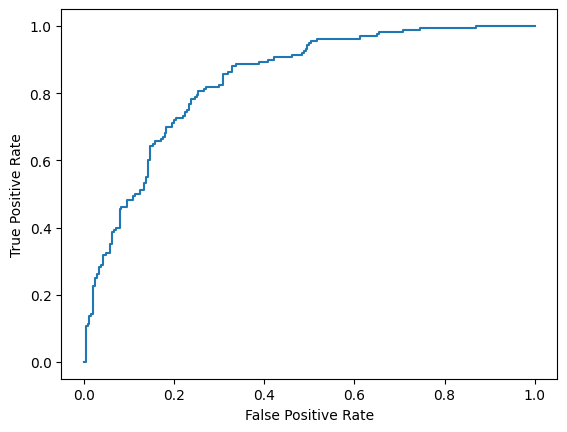

In [118]:
plt.plot(fpr_nb,tpr_nb)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

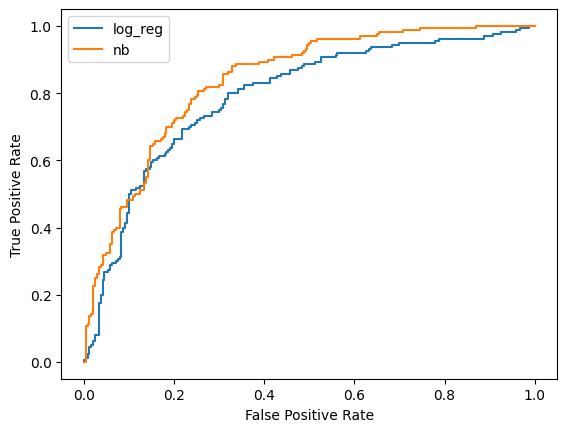

In [119]:
plt.plot(fpr,tpr, label='log_reg')
plt.plot(fpr_nb,tpr_nb, label='nb')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

From the above graph, we can infer that Naive Bayes is a slightly better model than Logistic Regression for our dataset.

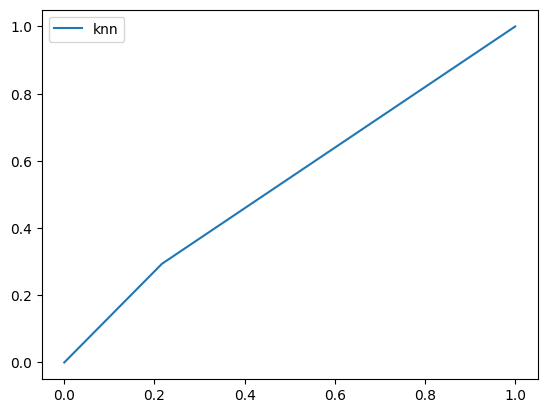

In [120]:
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, yhat_knn)
plt.plot(fpr_knn,tpr_knn, label='knn')
plt.legend()

In [121]:
print("knn F1: ", f1_score(y_test,yhat_knn))
print("knn precision: ", precision_score(y_test,yhat_knn))
print("knn precision: ", recall_score(y_test,yhat_knn))
print("knn precision: ", accuracy_score(y_test,yhat_knn))

knn F1:  0.362934362934363
knn precision:  0.47474747474747475
knn precision:  0.29375
knn precision:  0.5875


This doesn't give out a very good precision score so we will negate this model.

In [123]:
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(np.array(df.iloc[:,:38]), np.array(df.iloc[:,38]))
pred = knn.predict(np.array(df.iloc[:,:38]))

In [125]:
print(accuracy_score(pred, df.iloc[:,38]))
print(f1_score(pred, df.iloc[:,38]))
print(recall_score(pred, df.iloc[:,38]))
print(precision_score(pred, df.iloc[:,38]))

0.559
0.3204930662557781
0.5319693094629157
0.22932745314222713


This model doesn't seem to give us a good accuracy score either so we will not go ahead with this model. We will now perform SVC in order to check if that is a good model for our dataset or not.


In [126]:
log = LogisticRegression()
nb = GaussianNB()
knn = KNeighborsClassifier()
svc = SVC()

In [127]:
X_train, X_test, y_train, y_test = train_test_split(np.array(df.iloc[:,:21]), np.array(df.iloc[:,38]), test_size=0.2, random_state=123)

In [128]:
log.fit(X_train, y_train)
nb.fit(X_train, y_train)
knn.fit(X_train, y_train)
svc.fit(X_train, y_train)

SVC()

In [129]:
pred_l = log.predict(X_test)
pred_nb = nb.predict(X_test)
pred_knn = knn.predict(X_test)
pred_svc = svc.predict(X_test)

In [130]:
print(f1_score(pred_l, y_test))
print(f1_score(pred_nb, y_test))
print(f1_score(pred_knn, y_test))
print(f1_score(pred_svc, y_test))

0.30877192982456136
0.32653061224489793
0.4999999999999999
0.0


In [131]:
pred_l_prob = log.predict_proba(X_test)

In [132]:
fpr, tpr, thresholds = roc_curve(y_test, pred_l_prob[:,1])

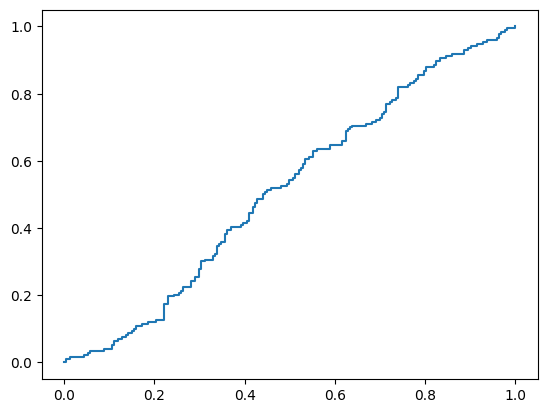

In [133]:
plt.plot(fpr, tpr)

In [134]:
gmeans = np.sqrt(tpr*(1-fpr))
gmeans

array([0.        , 0.        , 0.10728358, 0.10680781, 0.13081232,
       0.12875216, 0.14867019, 0.14798348, 0.16545056, 0.16506535,
       0.18082003, 0.1778381 , 0.19208711, 0.19022214, 0.21569163,
       0.21515971, 0.23786801, 0.23668752, 0.24721205, 0.24597289,
       0.2560167 , 0.2547204 , 0.26433585, 0.26366067, 0.27291472,
       0.27151155, 0.28041592, 0.27968851, 0.28829632, 0.28754457,
       0.30398874, 0.30159195, 0.30942681, 0.30694805, 0.31452816,
       0.31110927, 0.31843049, 0.31489227, 0.36771494, 0.36563156,
       0.38924452, 0.38589371, 0.39152749, 0.38809799, 0.3936032 ,
       0.39243697, 0.39785015, 0.3966643 , 0.40724387, 0.40233714,
       0.41752498, 0.41495557, 0.42472057, 0.42207431, 0.44084224,
       0.43945376, 0.45739797, 0.45449383, 0.45884315, 0.45292235,
       0.46138892, 0.45986869, 0.46403048, 0.4624914 , 0.47872408,
       0.47712567, 0.48108528, 0.47946819, 0.48338228, 0.48010507,
       0.49535028, 0.49365096, 0.5010747 , 0.49760702, 0.50487

In [135]:
thresholds[np.argmax(gmeans)]

0.44319412396014424

In [136]:
knn_params = {'n_neighbors':range(50,300)}

rs_knn = RandomizedSearchCV(knn, knn_params, n_iter=10, cv=5, scoring='f1')
rs_knn.fit(X_train,y_train)
rs_knn.best_estimator_

KNeighborsClassifier(n_neighbors=55)

In [137]:
svc_params = {'kernel':['linear','poly','rbf']}

rs_svc = RandomizedSearchCV(svc, svc_params, n_iter=3, cv=5, scoring='f1')
rs_svc.fit(X_train, y_train)
rs_svc.best_estimator_

SVC(kernel='linear')

In [138]:
svc_best = SVC(kernel='linear')
knn_best = KNeighborsClassifier(n_neighbors=72)

svc_best.fit(X_train,y_train)
knn_best.fit(X_train,y_train)

pred_svc_best = svc_best.predict(X_test)
pred_knn_best = knn_best.predict(X_test)

print(f1_score(pred_svc_best, y_test))
print(f1_score(pred_knn_best, y_test))

0.2825278810408922
0.33076923076923076


In [139]:
print(f1_score(pred_l, y_test))

0.30877192982456136


SVC looks like the worse performing model for our dataset as this has the lowest F1 score and is not that great in terms of our analysis.

THE MAIN ANSWER

Before delving into building a predictive model, it was important to understand the data through exploratory analysis wherein I did a univariate and bivariate analysis. This helped formulate hypotheses and identify trends or patterns that may affect conversions. I analyzed the distribution of visitors' gender and location and checked if certain demographics have higher conversion rates.Visitors who spend more time on the website, view more products, and have higher average ratings for products are more likely to convert. Certain marketing channels might yield higher conversion rates. Demographic factors, such as gender and location, might also play a role in conversions. Since there was no missing data in the dataset and no null values so cleaning wasn't really required. For feature Engineering, I created dummy variables for the categorical columns. The data was then split into training and testing and different models like Linear Regression, KNN, Naive Bayes, SVC, Decision Tree were performed on the dataset and all these models were evaluated in terms of accuracy score, precision, F1 score and ROC. It was found out that the Decision Tree performed the best out of all the model in predicting the results of the conversion. The model can predict whether a visitor is likely to convert based on their behavior and demographics. This information can be used to target potential converters with special offers through the week. By tailoring marketing efforts to the right audience, the company can increase conversions and revenue. The analysis revealed key behavioral and demographic characteristics that influence conversions. The chosen Decision Tree model provides an effective way to predict conversions and optimize marketing strategies, ultimately leading to improved business outcomes.
